In [1]:
import scanpy as sc
from pathlib import Path
import pandas as pd
import os
import numpy as np
import anndata as ad
from tqdm import tqdm
import matplotlib.pyplot as plt
# from jax.config import config
# config.update("jax_enable_x64", True)

from joblib import Parallel, delayed
import squidpy as sq
import scanpy as sc
from anndata import AnnData
from scipy.sparse import csr_matrix

%load_ext autoreload
%autoreload 2


In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/giovanni.palla/moscot/mapping/mouse_embryo/mouse_embryo_spatial_full.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 57536 × 351
    obs: 'uniqueID', 'embryo', 'pos', 'z', 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
adata.obs

,uniqueID,embryo,pos,z,Area,celltype_mapped_refined
embryo1_Pos0_cell10_z2,embryo1_Pos0_cell10_z2,embryo1,Pos0,2,10400,Low quality
embryo1_Pos0_cell10_z5,embryo1_Pos0_cell10_z5,embryo1,Pos0,5,2256,Lateral plate mesoderm
embryo1_Pos0_cell100_z2,embryo1_Pos0_cell100_z2,embryo1,Pos0,2,8144,Erythroid
embryo1_Pos0_cell100_z5,embryo1_Pos0_cell100_z5,embryo1,Pos0,5,6592,Lateral plate mesoderm
embryo1_Pos0_cell101_z2,embryo1_Pos0_cell101_z2,embryo1,Pos0,2,8560,Erythroid
...,...,...,...,...,...,...
embryo3_Pos39_cell95_z5,embryo3_Pos39_cell95_z5,embryo3,Pos39,5,9024,Low quality
embryo3_Pos39_cell96_z5,embryo3_Pos39_cell96_z5,embryo3,Pos39,5,13472,Presomitic mesoderm
embryo3_Pos39_cell97_z2,embryo3_Pos39_cell97_z2,embryo3,Pos39,2,5392,Presomitic mesoderm
embryo3_Pos39_cell98_z5,embryo3_Pos39_cell98_z5,embryo3,Pos39,5,10016,Presomitic mesoderm


/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

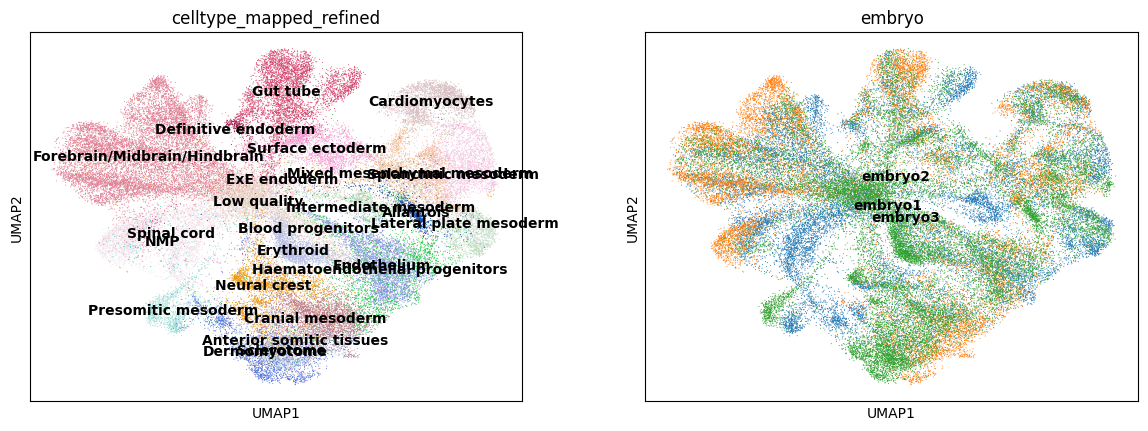

In [8]:
sc.pl.umap(adata, color=["celltype_mapped_refined", "embryo"], legend_loc="on data")

In [16]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/giovanni.palla/moscot/mapping/mouse_embryo/mouse_embryo_spatial_full.h5ad")
adatas= []
for b in adata.obs["embryo"].unique():
    adata_b = adata[adata.obs["embryo"] == b].copy()
    adata_b.X = adata_b.X / adata_b.obs["Area"].values[:,None]
    # sc.pp.normalize_total(adata_b, target_sum=1e4)
    sc.pp.log1p(adata_b)
    sc.pp.neighbors(adata_b, use_rep="X")
    sc.tl.umap(adata_b)
    adatas.append(adata_b)
    

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/pynndescent/sparse_nndescent.py:309: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(inds, indptr, data, dist, current_graph, leaf_array)
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/pynndescent/sparse_nndescent.py:311: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

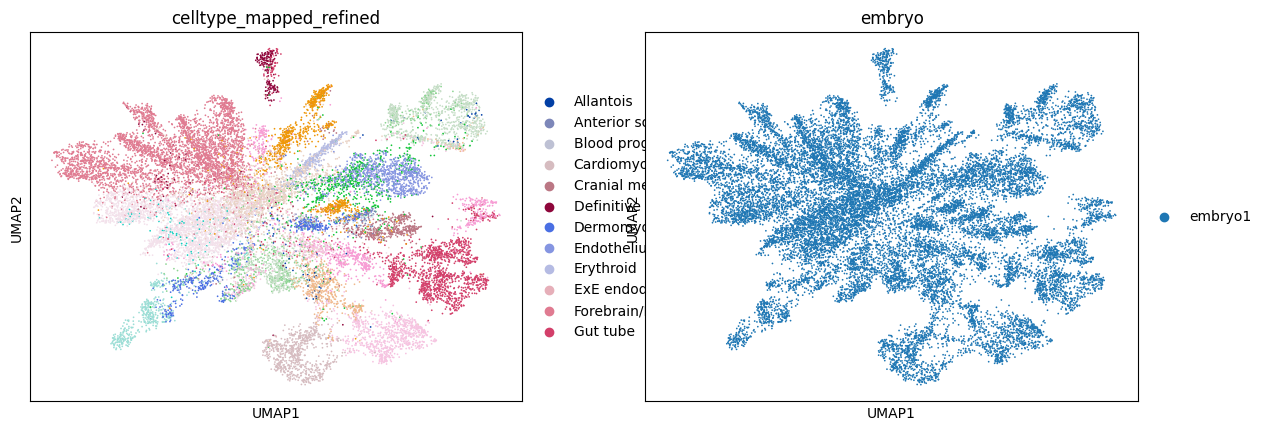

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

<Figure size 640x480 with 0 Axes>

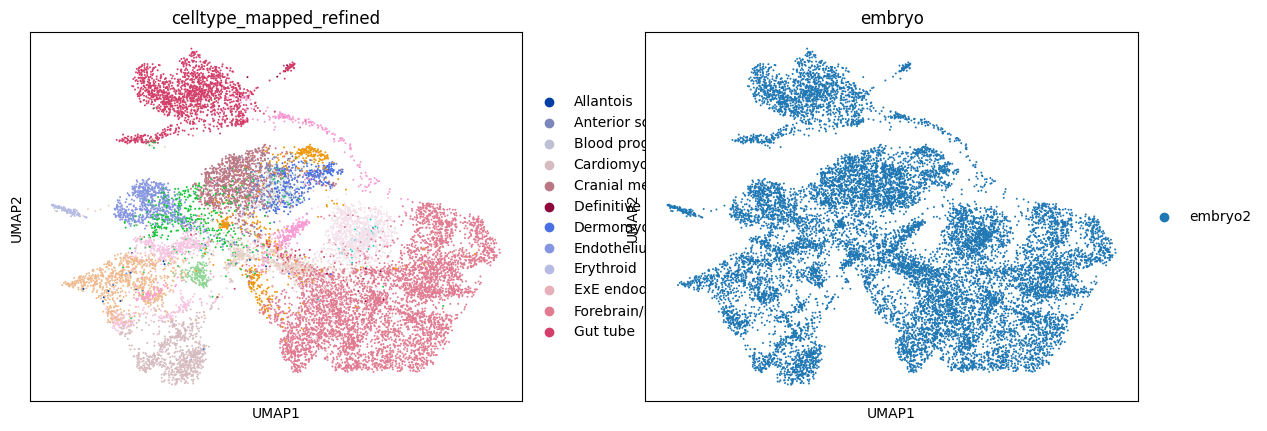

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning

<Figure size 640x480 with 0 Axes>

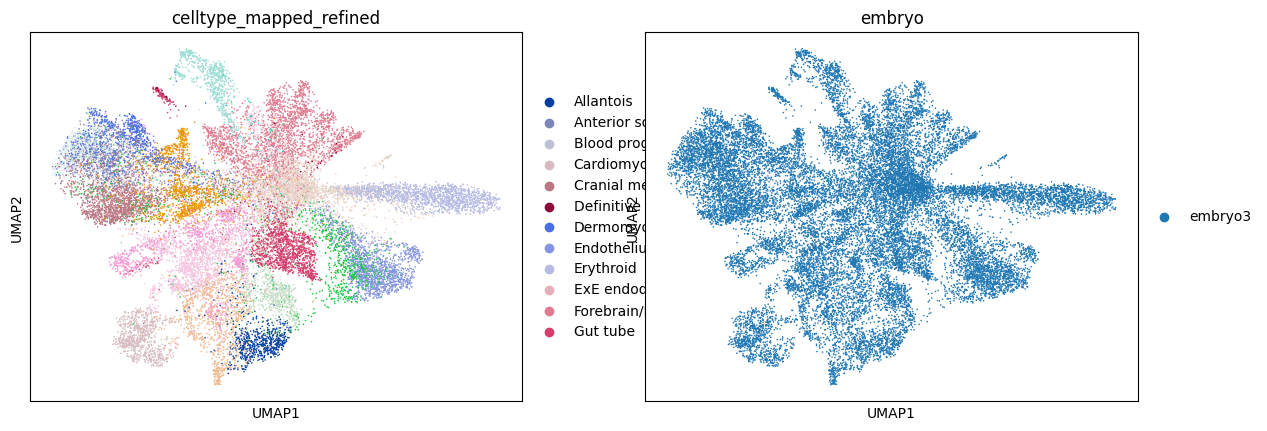

<Figure size 640x480 with 0 Axes>

In [17]:
for adata in adatas:
    sc.pl.umap(adata, color=["celltype_mapped_refined", "embryo"])
    plt.tight_layout()

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color

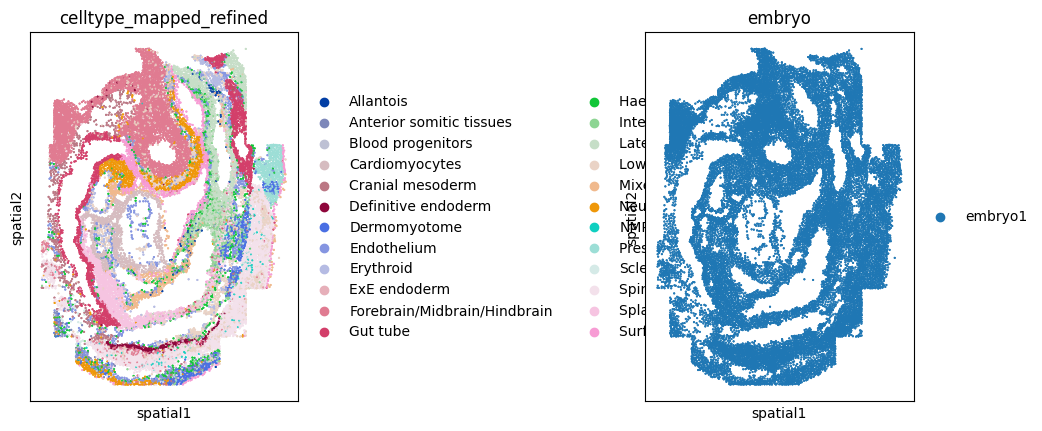

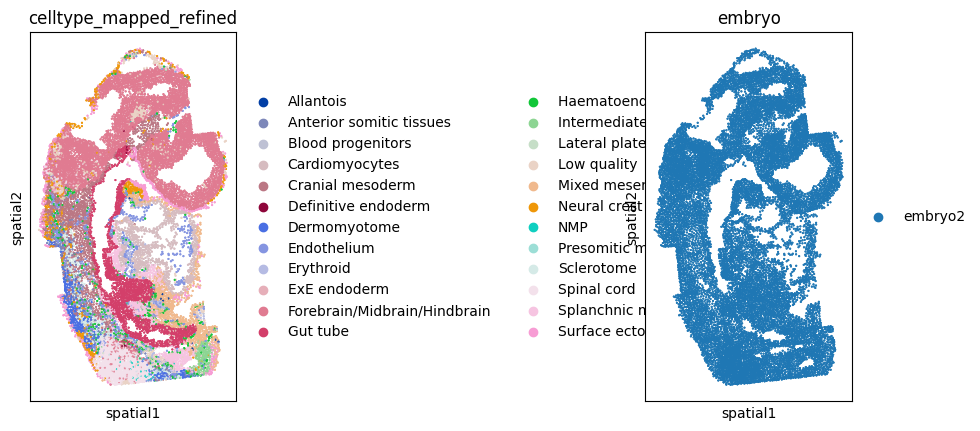

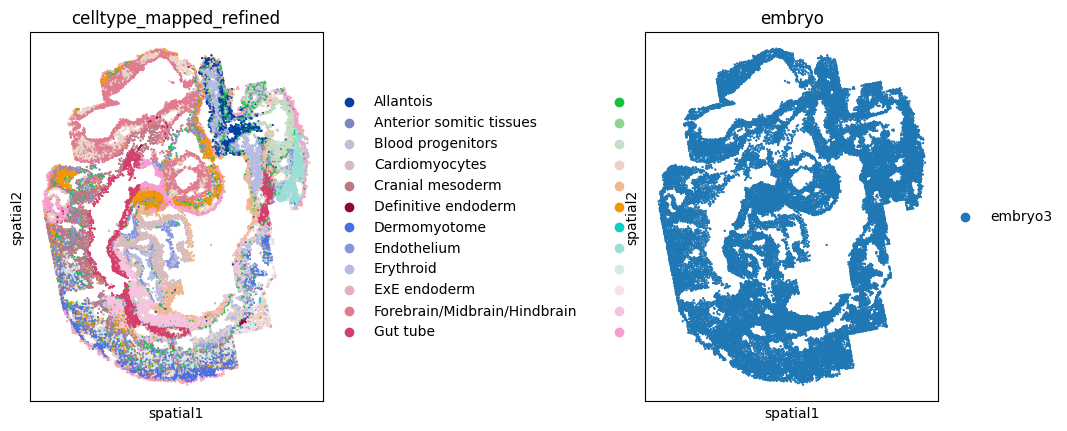

In [16]:
for adata in adatas:
    sq.pl.spatial_scatter(adata, color=["celltype_mapped_refined", "embryo"], shape=None, size=1)
    plt.tight_layout()

In [18]:
for i, adata in enumerate(adatas):
    adata.write_h5ad(f"/lustre/groups/ml01/workspace/giovanni.palla/moscot/mapping/mouse_embryo/mouse_embryo_spatial_{i+1}.h5ad")

In [4]:
adata = ad.read_h5ad("/lustre/groups/ml01/workspace/giovanni.palla/moscot/mapping/mouse_embryo/mouse_embryo_spatial_1.h5ad")
adata.var_names

Index(['Abcc4', 'Acp5', 'Acvr1', 'Acvr2a', 'Adora2b', 'Afp', 'Ahnak',
       'Akr1c19', 'Alas2', 'Aldh1a2',
       ...
       'Wnt2b', 'Wnt3', 'Wnt3a', 'Wnt5a', 'Wnt5b', 'Wnt8a', 'Xist', 'Zfp444',
       'Zfp57', 'Zic3'],
      dtype='object', length=351)